In [1]:
# Read-in imdb data
import csv

movies = {}

with open('imdb_dataset_v7.2_6_actors_complete.tsv') as csvfile:
    reader = csv.DictReader(csvfile, delimiter = "\t")
    for entry in reader:
        movies[
            entry["title"]
        ] = {
        "director":     entry["director"],
        "rating":       entry["rating"],
        "votes":        entry["votes"],
        "year":         entry["year"],
        "genre":        entry["genre"],
        "gross":        entry["gross"],
        "budget":       entry["budget"],
        "run-time":     entry["run-time"] ,
        "actor1":       entry["actor1"],
        "actor1_rank":  entry["actor1_rank"],
        "actor1_sex":   entry["actor1_sex"],
        "actor2":       entry["actor2"],
        "actor2_rank":  entry["actor2_rank"],
        "actor2_sex":   entry["actor2_sex"],
        "actor3":       entry["actor3"],
        "actor3_rank":  entry["actor3_rank"],
        "actor3_sex":   entry["actor3_sex"],
        "actor4":       entry["actor4"],
        "actor4_rank":  entry["actor4_rank"],
        "actor4_sex":   entry["actor4_sex"],
        "actor5":       entry["actor5"],
        "actor5_rank":  entry["actor5_rank"],
        "actor5_sex":   entry["actor5_sex"],
        "actor6":       entry["actor6"],
        "actor6_rank":  entry["actor6_rank"],
        "actor6_sex":   entry["actor6_sex"],
        "plot":         entry["plot"]
        }

In [2]:
# List of terms associated with movie script writing
movie_scripts_terms = ['written', 'int', 'ext', 'day', 'night', 'morning',
                       'evening' 'fade', 'cut', 'continued', 'cont']

In [3]:
import re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

# Function for getting tokens from text
def tokens(text):
    # Remove numbers
    no_numbers = re.sub(r'\d+(\.\d+)?', '', text)

    # Lowercase everything
    words_lowercase = no_numbers.lower()

    # Remove punctuations and tokenize
    tokens_rm_punct = RegexpTokenizer(r'\w+')
    tokens_without_punct = tokens_rm_punct.tokenize(words_lowercase)

    # Remove stop words
    no_stop_words = [word for word in tokens_without_punct if word not in stopwords.words('english')]
    
    # Remove terms associated with movie script writing
    no_movie_script_terms = [word for word in no_stop_words if word not in movie_scripts_terms]
    
    # Remove words that have less than 2 characters
    filtered_words = [word for word in no_movie_script_terms if len(word) > 2]

    return filtered_words

In [4]:
import os
import io

# Read-in movie scripts and add words to a dictonary of tokens
path = './scripts/'

scripts_tokens = {}
for filename in os.listdir(path):
    if("." in filename[-5:]):
        # Replace '.' when it appears after the year in filenames with '/' to match the imdb dataset
        correct_movie_name = filename.replace(".", "/")
        
        f = io.open(path + filename, 'r', encoding='utf8')
        scripts_tokens[correct_movie_name] = tokens(f.read())
    else:
        f = io.open(path + filename, 'r', encoding='utf8')
        scripts_tokens[filename] = tokens(f.read())

In [24]:
print len(scripts_tokens['American Beauty (1999)'])
print(scripts_tokens['American Beauty (1999)'])

10622
[u'fitts', u'house', u'ricky', u'bedroom', u'video', u'jane', u'burnham', u'lays', u'bed', u'wearing', u'tank', u'top', u'sixteen', u'dark', u'intense', u'eyes', u'jane', u'need', u'father', u'role', u'model', u'horny', u'geek', u'boy', u'gonna', u'spray', u'shorts', u'whenever', u'bring', u'girlfriend', u'home', u'school', u'snorts', u'lame', u'somebody', u'really', u'put', u'misery', u'mind', u'wanders', u'beat', u'ricky', u'want', u'kill', u'jane', u'looks', u'sits', u'jane', u'deadpan', u'yeah', u'would', u'fade', u'black', u'fade', u'robin', u'hood', u'trail', u'early', u'flying', u'suburban', u'america', u'descending', u'slowly', u'toward', u'tree', u'lined', u'street', u'lester', u'name', u'lester', u'burnham', u'neighborhood', u'street', u'life', u'forty', u'two', u'years', u'old', u'less', u'year', u'dead', u'burnham', u'house', u'master', u'bedroom', u'continuous', u'looking', u'king', u'sized', u'bed', u'overhead', u'lester', u'burnham', u'lies', u'sleeping', u'amidst'

In [25]:
print len(scripts_tokens['Almost Famous (2000)'])
print(scripts_tokens['Almost Famous (2000)'])

26
[u'almost', u'famous', u'cameron', u'crowe', u'break', u'frames', u'script', u'website', u'abstraction', u'http', u'wsabstract', u'com', u'free', u'scripts', u'notice', u'must', u'stay', u'entact', u'use', u'window', u'top', u'top', u'location', u'href', u'location', u'href']


In [34]:
import operator

movies_num_of_tokens = {}
for movie, tokens in scripts_tokens.iteritems():
    movies_num_of_tokens[movie] = len(tokens)

movies_num_of_tokens_sorted = sorted(movies_num_of_tokens.items(), key=operator.itemgetter(1))
for i in movies_num_of_tokens_sorted:
    print i

('Platoon (1986)', 0)
('The English Patient (1996)', 0)
('Clueless (1995)', 1)
('The Beach (2000/I)', 1)
('Bones (2001)', 1)
("You've Got Mail (1998)", 2)
('Enemy of the State (1998)', 2)
('The Usual Suspects (1995)', 2)
('Buffy the Vampire Slayer (1992)', 3)
('The Sixth Sense (1999)', 3)
('Tremors (1990)', 4)
('Pearl Harbor (2001)', 4)
('Mystery Men (1999)', 4)
('Leaving Las Vegas (1995)', 5)
('Minority Report (2002)', 6)
('John Q (2002)', 8)
('Independence Day (1996)', 8)
('Never Been Kissed (1999)', 9)
('Frequency (2000)', 10)
('Air Force One (1997)', 10)
('Blade II (2002)', 10)
('Resident Evil (2002)', 11)
('Top Gun (1986)', 11)
('Nurse Betty (2000)', 13)
("There's Something About Mary (1998)", 17)
('Broadcast News (1987)', 24)
('Jurassic Park III (2001)', 24)
('Toy Story (1995)', 24)
('Almost Famous (2000)', 26)
('Stepmom (1998)', 29)
('The Saint (1997)', 157)
('Red Planet (2000)', 158)
('At First Sight (1999)', 158)
('True Romance (1993)', 158)
('They (2002)', 1056)
('Apt Pupil (

In [45]:
token_string = ""
for i in scripts_tokens['Titanic (1997)']:
    token_string += i + " "

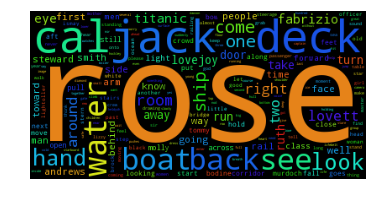

In [46]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt
%matplotlib inline
    
wordcloud = WordCloud().generate(token_string)
img=plt.imshow(wordcloud)
plt.axis("off")
plt.show()